## Create Sample dataset


In [2]:
import pandas as pd
import numpy as np

date_range = pd.date_range(start="2024-01-01", end="2024-12-31", freq='D')
repeated_dates = np.repeat(date_range, 5)
departments = ['Cardiology', 'Neurology', 'Oncology', 'Emergency', 'Pathology']

repeated_departments = np.tile(departments, len(date_range))
working_staff = np.random.randint(10, 20, len(repeated_dates))
patient_counts = np.random.randint(5, 65, len(repeated_dates))
attrition_rate = np.random.randint(1, 13, len(repeated_dates))
staff_hired = np.random.randint(0, 8, len(repeated_dates))
previous_patient_counts = np.random.randint(10, 45, len(repeated_dates))

df = pd.DataFrame({
    "Date": repeated_dates,
    "Department": repeated_departments,
    "Working Staff": working_staff,
    "Patient Count": patient_counts,
    "Attrition Rate": attrition_rate,
    "Staff Hired": staff_hired,
    "Previous Patient Count": previous_patient_counts
})

df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')

df.to_csv('staff_prediction.csv', index=False)



## Sort By Department

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = 'C:/DataScience/Pro/staff prediction/staff_prediction.csv' 
df = pd.read_csv(file_path)

df_encoded = pd.get_dummies(df, columns=['Department'], drop_first=False)

X = df_encoded[['Working Staff', 'Patient Count', 'Attrition Rate', 'Previous Patient Count'] + list(df_encoded.columns[df_encoded.columns.str.startswith('Department')])]
y = df['Staff Hired']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

model = RandomForestRegressor(random_state=80)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

next_month_data = df_encoded[df['Date'] > '30-11-2024]']

X_next_month = next_month_data[['Working Staff', 'Patient Count', 'Attrition Rate', 'Previous Patient Count'] + list(df_encoded.columns[df_encoded.columns.str.startswith('Department')])]

predicted_staff_hired = model.predict(X_next_month)
predicted_staff_hired = np.round(predicted_staff_hired).astype(int)

next_month_data['Predicted Staff Hired'] = predicted_staff_hired

department_columns = [col for col in df_encoded.columns if col.startswith('Department')]
next_month_data['Department'] = next_month_data[department_columns].idxmax(axis=1).str.replace('Department_', '')

staff_recruitment_per_department = next_month_data.groupby('Department')['Predicted Staff Hired'].sum().reset_index()
staff_recruitment_per_department['Predicted Staff Hired'] = staff_recruitment_per_department['Predicted Staff Hired'].astype(int)

print("Predicted staff to hire in each department for the next month:")
print(staff_recruitment_per_department)


Mean Absolute Error: 2.025261839708561
Mean Squared Error: 5.747770414010322
Root Mean Squared Error: 2.397450815764595
Predicted staff to hire in each department for the next month:
   Department  Predicted Staff Hired
0  Cardiology                     29
1   Emergency                     26
2   Neurology                     29
3    Oncology                     32
4   Pathology                     24


C:\Users\ajinr\AppData\Local\Temp\ipykernel_32844\842637064.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  next_month_data['Predicted Staff Hired'] = predicted_staff_hired
C:\Users\ajinr\AppData\Local\Temp\ipykernel_32844\842637064.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  next_month_data['Department'] = next_month_data[department_columns].idxmax(axis=1).str.replace('Department_', '')


## Graphical Representation

C:\Users\ajinr\AppData\Local\Temp\ipykernel_32844\401781271.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=staff_recruitment_per_department, x='Department', y='Predicted Staff Hired', palette='viridis')


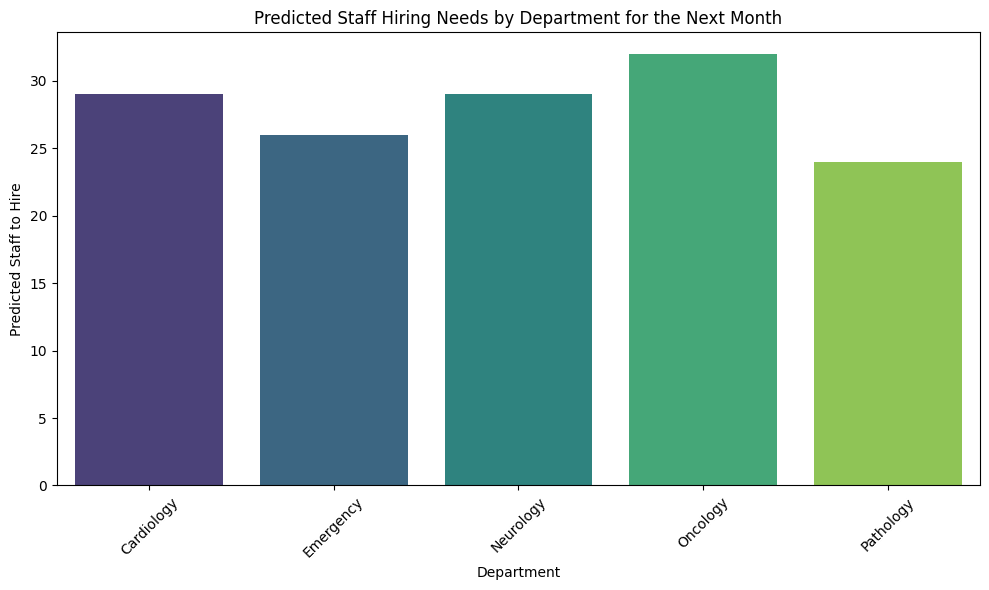

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=staff_recruitment_per_department, x='Department', y='Predicted Staff Hired', palette='viridis')

plt.xlabel('Department')
plt.ylabel('Predicted Staff to Hire')
plt.title('Predicted Staff Hiring Needs by Department for the Next Month')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## Given Names Using Faker

In [6]:
import sqlite3
from faker import Faker
import pandas as pd
import random
from datetime import datetime, timedelta
from tabulate import tabulate

def generate_staff_data():
    fake = Faker()
    num_staff = 32

    staff_data = []
    staff_types = []
    staff_types.extend(['Doctor'] * 8)
    staff_types.extend(['Nurse'] * 16)
    staff_types.extend(['Technician'] * 8)

    for i in range(num_staff):
        if i < 8:
            years_exp = random.randint(3, 6)
        else:
            years_exp = random.randint(1, 2)

        staff_member = {
            'Staff_ID': f'CAD{str(i+10).zfill(2)}',
            'Staff_Name': fake.unique.name(),
            'Staff_Type': staff_types[i],
            'Years_of_Experience': years_exp
        }
        staff_data.append(staff_member)

    df = pd.DataFrame(staff_data)
    df['Department'] = 'Cardiology'
    return df[['Department', 'Staff_ID', 'Staff_Name', 'Staff_Type', 'Years_of_Experience']]

def save_staff_data_to_sqlite(df, database='staff_cardio.db'):
    conn = sqlite3.connect(database)
    df.to_sql('staff_data', conn, if_exists='replace', index=False)
    conn.close()
    print(f"Staff data saved to {database}")

def save_staff_data_to_csv(df, filename='staff_cardio.csv'):
    df.to_csv(filename, index=False)
    print(f"Staff data saved to {filename}")

if __name__ == "__main__":
    print("\nGenerating staff data...")
    df = generate_staff_data()

    print("\nCardiology Staff Data:")
    print(tabulate(df, headers='keys', tablefmt='grid'))

    save_staff_data_to_sqlite(df)
    save_staff_data_to_csv(df)



Generating staff data...

Cardiology Staff Data:
+----+--------------+------------+----------------------+--------------+-----------------------+
|    | Department   | Staff_ID   | Staff_Name           | Staff_Type   |   Years_of_Experience |
+====+==============+============+======================+==============+=======================+
|  0 | Cardiology   | CAD10      | Brenda Scott         | Doctor       |                     3 |
+----+--------------+------------+----------------------+--------------+-----------------------+
|  1 | Cardiology   | CAD11      | Steven Torres        | Doctor       |                     6 |
+----+--------------+------------+----------------------+--------------+-----------------------+
|  2 | Cardiology   | CAD12      | Sarah Gonzales       | Doctor       |                     4 |
+----+--------------+------------+----------------------+--------------+-----------------------+
|  3 | Cardiology   | CAD13      | William Marshall     | Doctor       |     

# Staff Assigned for Two week 

In [8]:
import sqlite3
import pandas as pd
from datetime import datetime, timedelta
from tabulate import tabulate
import random


def load_staff_data_from_csv(filename='staff_cardio.csv'):
    return pd.read_csv(filename)


def format_name_with_details(row):
    return f"{row['Staff_Name']} ({row['Staff_Type']}, {row['Years_of_Experience']} yrs)"


def get_staff_by_type(data, staff_type, experience_threshold=3):
    staff = data[data['Staff_Type'] == staff_type].copy()
    staff['Name_With_Details'] = staff.apply(format_name_with_details, axis=1)
    return {
        'high': staff[staff['Years_of_Experience'] >= experience_threshold],
        'low': staff[staff['Years_of_Experience'] < experience_threshold]
    }


def rotate_shifts(shift_teams):
    shifts = ["Night", "Morning", "Afternoon", "Evening"]
    rotated_teams = {}
    for i, shift in enumerate(shifts):
        next_shift = shifts[(i + 1) % len(shifts)]
        rotated_teams[next_shift] = shift_teams[shift]
    return rotated_teams


def generate_weekly_shift_teams(df, rotate=False, previous_shift_teams=None):
    shifts = ["Night", "Morning", "Afternoon", "Evening"]

    if rotate and previous_shift_teams:
        return rotate_shifts(previous_shift_teams)

    doctors = get_staff_by_type(df, 'Doctor')
    nurses = get_staff_by_type(df, 'Nurse')
    technicians = get_staff_by_type(df, 'Technician')

    all_doctors = list(df[df['Staff_Type'] == 'Doctor']['Staff_ID'])
    all_nurses = list(df[df['Staff_Type'] == 'Nurse']['Staff_ID'])
    all_technicians = list(df[df['Staff_Type'] == 'Technician']['Staff_ID'])

    random.shuffle(all_doctors)
    random.shuffle(all_nurses)
    random.shuffle(all_technicians)

    shift_teams = {}

    def get_staff_details(staff_id):
        staff_row = df[df['Staff_ID'] == staff_id].iloc[0]
        return format_name_with_details(staff_row)

    for i, shift in enumerate(shifts):
        doctor_id = all_doctors[i % len(all_doctors)]
        high_exp_nurses = [n for n in all_nurses if df[df['Staff_ID'] == n]['Years_of_Experience'].iloc[0] >= 3]
        low_exp_nurses = [n for n in all_nurses if df[df['Staff_ID'] == n]['Years_of_Experience'].iloc[0] < 3]

        nurse1_id = high_exp_nurses[i % len(high_exp_nurses)] if high_exp_nurses else all_nurses[i % len(all_nurses)]
        available_nurses = [n for n in all_nurses if n != nurse1_id]
        nurse2_id = available_nurses[i % len(available_nurses)]

        tech_id = all_technicians[i % len(all_technicians)]

        shift_teams[shift] = {
            'Doctor': get_staff_details(doctor_id),
            'High_Exp_Nurse': get_staff_details(nurse1_id),
            'Other_Nurse': get_staff_details(nurse2_id),
            'Technician': get_staff_details(tech_id)
        }

    return shift_teams


def generate_schedule(start_date, weeks=1, df=None):
    shifts = ["Night", "Morning", "Afternoon", "Evening"]
    shift_times = {
        "Night": "12 am - 6 am",
        "Morning": "6 am - 12 pm",
        "Afternoon": "12 pm - 6 pm",
        "Evening": "6 pm - 12 am"
    }
    schedule = []
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    shift_teams = generate_weekly_shift_teams(df)

    for week in range(weeks):
        current_shift_teams = shift_teams
        for day in range(7):
            current_date = start_date + timedelta(days=week * 7 + day)
            day_schedule = {'Date': current_date.strftime("%Y-%m-%d")}

            for shift in shifts:
                team = current_shift_teams[shift]
                staff_list = [
                    team['Doctor'],
                    team['High_Exp_Nurse'],
                    team['Other_Nurse'],
                    team['Technician']
                ]
                day_schedule[f"{shift} ({shift_times[shift]})"] = '\n'.join(staff_list)

            schedule.append(day_schedule)
        
        shift_teams = rotate_shifts(current_shift_teams)

    return pd.DataFrame(schedule)


def save_schedule_to_sqlite(schedule_df, database='staff_schedule.db'):
    conn = sqlite3.connect(database)
    schedule_df.to_sql('weekly_schedule', conn, if_exists='replace', index=False)
    conn.close()
    print(f"Schedule saved to {database}")

if __name__ == "__main__":
   
    df = load_staff_data_from_csv()
   
    start_date = input("Enter the start date for the schedule (YYYY-MM-DD): ")
    num_weeks = int(input("Enter the number of weeks to generate the schedule for: "))
   
    schedule_df = generate_schedule(start_date, weeks=num_weeks, df=df)
    
    print(tabulate(schedule_df, headers='keys', tablefmt='grid'))
   
    save_schedule_to_sqlite(schedule_df)


+----+------------+-------------------------------------+------------------------------------+-----------------------------------+-------------------------------------+
|    | Date       | Night (12 am - 6 am)                | Morning (6 am - 12 pm)             | Afternoon (12 pm - 6 pm)          | Evening (6 pm - 12 am)              |
+====+============+=====================================+====================================+===================================+=====================================+
|  0 | 2024-11-03 | Tina Nguyen DVM (Doctor, 6 yrs)     | Michael Rose (Doctor, 4 yrs)       | William Marshall (Doctor, 3 yrs)  | Sarah Gonzales (Doctor, 4 yrs)      |
|    |            | Christian Anderson (Nurse, 2 yrs)   | Jared Rivera (Nurse, 1 yrs)        | Janice Green (Nurse, 1 yrs)       | Paul Hernandez (Nurse, 2 yrs)       |
|    |            | Jared Rivera (Nurse, 1 yrs)         | Janice Green (Nurse, 1 yrs)        | Paul Hernandez (Nurse, 2 yrs)     | Vincent Willis (Nurse, 1

# For better UI used Tkinder

In [1]:
import tkinter as tk
from tkinter import ttk, filedialog, messagebox
from tkcalendar import DateEntry
import sqlite3
import pandas as pd
from datetime import datetime, timedelta
import random
from PIL import Image, ImageTk
import os

class HospitalScheduler(tk.Tk):
    def __init__(self):
        super().__init__()

        self.title("Hospital Staff Scheduler")
        self.geometry("1400x800")  
        self.configure(bg="#f0f2f5")
        
        self.staff_data = None
        self.current_schedule = None
        
        self.create_styles()
        self.create_widgets()
        
    def create_styles(self):
        style = ttk.Style()
        style.theme_use('clam')
        
        style.configure(
            "Primary.TButton",
            foreground="#ffffff",
            background="#1a73e8",
            padding=10,
            font=('Helvetica', 10, 'bold')
        )
        
        style.configure(
            "Card.TFrame",
            background="#ffffff",
            relief="flat",
            borderwidth=1
        )
        
        style.configure(
            "Header.TLabel",
            font=('Helvetica', 16, 'bold'),
            background="#ffffff",
            foreground="#202124"
        )
        
        style.configure(
            "SubHeader.TLabel",
            font=('Helvetica', 12),
            background="#ffffff",
            foreground="#5f6368"
        )

        style.configure(
            "Custom.Treeview",
            rowheight=100,
            font=('Helvetica', 10),
            background="#ffffff",
            fieldbackground="#ffffff"
        )
        style.configure(
            "Custom.Treeview.Heading",
            font=('Helvetica', 10, 'bold')
        )

    def create_widgets(self):
        self.main_container = ttk.Frame(self, style="Card.TFrame", padding="20")
        self.main_container.pack(fill=tk.BOTH, expand=True, padx=20, pady=20)
        
        header_frame = ttk.Frame(self.main_container, style="Card.TFrame")
        header_frame.pack(fill=tk.X, pady=(0, 20))
        
        ttk.Label(
            header_frame,
            text="Hospital Staff Scheduler",
            style="Header.TLabel"
        ).pack(pady=(0, 5))
        
        ttk.Label(
            header_frame,
            text="Generate and manage staff schedules efficiently",
            style="SubHeader.TLabel"
        ).pack()
        
        input_frame = ttk.LabelFrame(
            self.main_container,
            text="Schedule Configuration",
            padding="20"
        )
        input_frame.pack(fill=tk.X, pady=(0, 20))
        
        file_frame = ttk.Frame(input_frame)
        file_frame.pack(fill=tk.X, pady=(0, 10))
        
        self.file_label = ttk.Label(
            file_frame,
            text="No file selected",
            style="SubHeader.TLabel"
        )
        self.file_label.pack(side=tk.LEFT, padx=(0, 10))
        
        ttk.Button(
            file_frame,
            text="Upload Staff Data (CSV)",
            command=self.load_csv_file,
            style="Primary.TButton"
        ).pack(side=tk.RIGHT)
        
        config_frame = ttk.Frame(input_frame)
        config_frame.pack(fill=tk.X, pady=(10, 0))
        
     
        date_frame = ttk.Frame(config_frame)
        date_frame.pack(side=tk.LEFT, padx=(0, 20))
        
        ttk.Label(
            date_frame,
            text="Start Date:"
        ).pack(side=tk.LEFT, padx=(0, 10))
        
        self.start_date = DateEntry(
            date_frame,
            width=12,
            background='#1a73e8',
            foreground='white',
            borderwidth=2
        )
        self.start_date.pack(side=tk.LEFT)
        
      
        weeks_frame = ttk.Frame(config_frame)
        weeks_frame.pack(side=tk.LEFT)
        
        ttk.Label(
            weeks_frame,
            text="Number of Weeks:"
        ).pack(side=tk.LEFT, padx=(0, 10))
        
        self.weeks_var = tk.StringVar(value="1")
        weeks_spinbox = ttk.Spinbox(
            weeks_frame,
            from_=1,
            to=52,
            width=5,
            textvariable=self.weeks_var
        )
        weeks_spinbox.pack(side=tk.LEFT)
       
        ttk.Button(
            input_frame,
            text="Generate Schedule",
            command=self.generate_schedule,
            style="Primary.TButton"
        ).pack(pady=(20, 0))
     
        self.schedule_frame = ttk.LabelFrame(
            self.main_container,
            text="Generated Schedule",
            padding="20"
        )
        self.schedule_frame.pack(fill=tk.BOTH, expand=True)
        
       
        self.create_schedule_treeview()
        
    def create_schedule_treeview(self):
      
        tree_frame = ttk.Frame(self.schedule_frame)
        tree_frame.pack(fill=tk.BOTH, expand=True)
        
      
        self.tree_h_scroll = ttk.Scrollbar(tree_frame, orient="horizontal")
        self.tree_h_scroll.pack(side=tk.BOTTOM, fill=tk.X)
        
        self.tree_scroll = ttk.Scrollbar(tree_frame)
        self.tree_scroll.pack(side=tk.RIGHT, fill=tk.Y)
    
        self.tree = ttk.Treeview(
            tree_frame,
            yscrollcommand=self.tree_scroll.set,
            xscrollcommand=self.tree_h_scroll.set,
            show="headings",
            style="Custom.Treeview"
        )
        self.tree.pack(fill=tk.BOTH, expand=True)
        
      
        self.tree_scroll.config(command=self.tree.yview)
        self.tree_h_scroll.config(command=self.tree.xview)
     
        columns = ["Date", "Night (12 am - 6 am)", "Morning (6 am - 12 pm)", 
                  "Afternoon (12 pm - 6 pm)", "Evening (6 pm - 12 am)"]
        self.tree["columns"] = columns
        
        
        self.tree.column("Date", width=100, minwidth=100)
        for col in columns[1:]:  # For shift columns
            self.tree.column(col, width=300, minwidth=300)
        
        # Configure column headings
        for col in columns:
            self.tree.heading(col, text=col)
        
        # Configure tags for alternating row colors
        self.tree.tag_configure('oddrow', background='#f0f0f0')
        self.tree.tag_configure('evenrow', background='#ffffff')

    def load_csv_file(self):
        filename = filedialog.askopenfilename(
            filetypes=[("CSV files", "*.csv")]
        )
        if filename:
            try:
                self.staff_data = pd.read_csv(filename)
                self.file_label.config(
                    text=f"Loaded: {os.path.basename(filename)}"
                )
            except Exception as e:
                messagebox.showerror(
                    "Error",
                    f"Failed to load CSV file: {str(e)}"
                )

    def generate_schedule(self):
        if self.staff_data is None:
            messagebox.showerror(
                "Error",
                "Please upload staff data CSV file first!"
            )
            return
            
        try:
            start_date = self.start_date.get_date().strftime("%Y-%m-%d")
            weeks = int(self.weeks_var.get())
            
          
            for item in self.tree.get_children():
                self.tree.delete(item)
            
          
            schedule_df = generate_schedule(start_date, weeks=weeks, df=self.staff_data)
            
            
            for i, row in schedule_df.iterrows():
                values = [
                    row['Date'],
                    self.format_staff_list(row['Night (12 am - 6 am)']),
                    self.format_staff_list(row['Morning (6 am - 12 pm)']),
                    self.format_staff_list(row['Afternoon (12 pm - 6 pm)']),
                    self.format_staff_list(row['Evening (6 pm - 12 am)'])
                ]
                tag = 'evenrow' if i % 2 == 0 else 'oddrow'
                self.tree.insert('', tk.END, values=values, tags=(tag,))
                
            
            save_schedule_to_sqlite(schedule_df)
            messagebox.showinfo(
                "Success",
                "Schedule generated and saved successfully!"
            )
            
        except Exception as e:
            messagebox.showerror(
                "Error",
                f"Failed to generate schedule: {str(e)}"
            )

    def format_staff_list(self, staff_text):
       
        staff_members = staff_text.split('\n')
        formatted_staff = []
        for staff in staff_members:
            formatted_staff.append(f"{staff.strip()}")
        return '\n'.join(formatted_staff)

def format_name_with_details(row):
    return f"{row['Staff_Name']} ({row['Staff_Type']}, {row['Years_of_Experience']} yrs)"

def get_staff_by_type(data, staff_type, experience_threshold=3):
    staff = data[data['Staff_Type'] == staff_type].copy()
    staff['Name_With_Details'] = staff.apply(format_name_with_details, axis=1)
    return {
        'high': staff[staff['Years_of_Experience'] >= experience_threshold],
        'low': staff[staff['Years_of_Experience'] < experience_threshold]
    }

def rotate_shifts(shift_teams):
    shifts = ["Night", "Morning", "Afternoon", "Evening"]
    rotated_teams = {}
    for i, shift in enumerate(shifts):
        next_shift = shifts[(i + 1) % len(shifts)]
        rotated_teams[next_shift] = shift_teams[shift]
    return rotated_teams

def generate_weekly_shift_teams(df, rotate=False, previous_shift_teams=None):
    shifts = ["Night", "Morning", "Afternoon", "Evening"]
    
    if rotate and previous_shift_teams:
        return rotate_shifts(previous_shift_teams)

    doctors = get_staff_by_type(df, 'Doctor')
    nurses = get_staff_by_type(df, 'Nurse')
    technicians = get_staff_by_type(df, 'Technician')

    all_doctors = list(df[df['Staff_Type'] == 'Doctor']['Staff_ID'])
    all_nurses = list(df[df['Staff_Type'] == 'Nurse']['Staff_ID'])
    all_technicians = list(df[df['Staff_Type'] == 'Technician']['Staff_ID'])

    random.shuffle(all_doctors)
    random.shuffle(all_nurses)
    random.shuffle(all_technicians)

    shift_teams = {}

    def get_staff_details(staff_id):
        staff_row = df[df['Staff_ID'] == staff_id].iloc[0]
        return format_name_with_details(staff_row)

    for i, shift in enumerate(shifts):
        doctor_id = all_doctors[i % len(all_doctors)]
        high_exp_nurses = [n for n in all_nurses if df[df['Staff_ID'] == n]['Years_of_Experience'].iloc[0] >= 3]
        low_exp_nurses = [n for n in all_nurses if df[df['Staff_ID'] == n]['Years_of_Experience'].iloc[0] < 3]

        nurse1_id = high_exp_nurses[i % len(high_exp_nurses)] if high_exp_nurses else all_nurses[i % len(all_nurses)]
        available_nurses = [n for n in all_nurses if n != nurse1_id]
        nurse2_id = available_nurses[i % len(available_nurses)]

        tech_id = all_technicians[i % len(all_technicians)]

        shift_teams[shift] = {
            'Doctor': get_staff_details(doctor_id),
            'High_Exp_Nurse': get_staff_details(nurse1_id),
            'Other_Nurse': get_staff_details(nurse2_id),
            'Technician': get_staff_details(tech_id)
        }

    return shift_teams

def generate_schedule(start_date, weeks=1, df=None):
    shifts = ["Night", "Morning", "Afternoon", "Evening"]
    shift_times = {
        "Night": "12 am - 6 am",
        "Morning": "6 am - 12 pm",
        "Afternoon": "12 pm - 6 pm",
        "Evening": "6 pm - 12 am"
    }
    schedule = []
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    shift_teams = generate_weekly_shift_teams(df)

    for week in range(weeks):
        current_shift_teams = shift_teams
        for day in range(7):
            current_date = start_date + timedelta(days=week * 7 + day)
            day_schedule = {'Date': current_date.strftime("%Y-%m-%d")}

            for shift in shifts:
                team = current_shift_teams[shift]
                staff_list = [
                    team['Doctor'],
                    team['High_Exp_Nurse'],
                    team['Other_Nurse'],
                    team['Technician']
                ]
                day_schedule[f"{shift} ({shift_times[shift]})"] = '\n'.join(staff_list)

            schedule.append(day_schedule)
        
        shift_teams = rotate_shifts(current_shift_teams)

    return pd.DataFrame(schedule)

def save_schedule_to_sqlite(schedule_df, database='staff_schedule.db'):
    conn = sqlite3.connect(database)
    schedule_df.to_sql('weekly_schedule', conn, if_exists='replace', index=False)
    conn.close()
  
if __name__ == "__main__":
    app = HospitalScheduler()
    app.mainloop()